### Analyze Helpdesk tickets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import RobustScaler

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
tickets = pd.read_csv("C:/Users/debmalya.ray/Desktop/tickets/WA_Fn-UseC_-IT-Help-Desk.csv")

In [5]:
tickets.columns

Index(['ticket', 'requestor', 'RequestorSeniority', 'ITOwner', 'FiledAgainst',
       'TicketType', 'Severity', 'Priority', 'daysOpen', 'Satisfaction'],
      dtype='object')

In [6]:
tickets = tickets[['ticket', 'requestor', 'RequestorSeniority', 'ITOwner', 'FiledAgainst',
       'TicketType', 'Priority', 'daysOpen', 'Satisfaction']]

In [7]:
tickets.head(3)

ticket  requestor RequestorSeniority  ITOwner  FiledAgainst TicketType  \
0       1       1929         1 - Junior       50       Systems      Issue   
1       2       1587        2 - Regular       15      Software    Request   
2       3        925        2 - Regular       15  Access/Login    Request   

         Priority  daysOpen     Satisfaction  
0  0 - Unassigned         3  1 - Unsatisfied  
1         1 - Low         5  1 - Unsatisfied  
2  0 - Unassigned         0      0 - Unknown

#### Exploratory Data Science

In [8]:
tickets.shape

(100000, 9)

In [9]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int64 
 2   RequestorSeniority  100000 non-null  object
 3   ITOwner             100000 non-null  int64 
 4   FiledAgainst        100000 non-null  object
 5   TicketType          100000 non-null  object
 6   Priority            100000 non-null  object
 7   daysOpen            100000 non-null  int64 
 8   Satisfaction        100000 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.9+ MB


In [10]:
train, test = train_test_split(tickets, test_size=0.25, random_state=42, shuffle=True)

### Missing Value Imputation

In [11]:
train.size, test.size

(675000, 225000)

In [12]:
tickets.isnull().sum()

ticket                0
requestor             0
RequestorSeniority    0
ITOwner               0
FiledAgainst          0
TicketType            0
Priority              0
daysOpen              0
Satisfaction          0
dtype: int64

In [13]:
print(tickets.isnull().sum()/tickets.shape[0] *100)

ticket                0.0
requestor             0.0
RequestorSeniority    0.0
ITOwner               0.0
FiledAgainst          0.0
TicketType            0.0
Priority              0.0
daysOpen              0.0
Satisfaction          0.0
dtype: float64


In [14]:
tickets.Satisfaction.value_counts()

0 - Unknown             30211
3 - Highly satisfied    29063
1 - Unsatisfied         21124
2 - Satisfied           19602
Name: Satisfaction, dtype: int64

In [15]:
tickets.Satisfaction = tickets.Satisfaction.astype('category').cat.codes

In [16]:
tickets.head(2)

ticket  requestor RequestorSeniority  ITOwner FiledAgainst TicketType  \
0       1       1929         1 - Junior       50      Systems      Issue   
1       2       1587        2 - Regular       15     Software    Request   

         Priority  daysOpen  Satisfaction  
0  0 - Unassigned         3             1  
1         1 - Low         5             1

In [18]:
tickets.Priority = tickets.Priority.astype('category').cat.codes
# tickets.Severity = tickets.Severity.astype('category').cat.codes
tickets.TicketType = tickets.TicketType.astype('category').cat.codes
tickets.FiledAgainst = tickets.FiledAgainst.astype('category').cat.codes
tickets.RequestorSeniority = tickets.RequestorSeniority.astype('category').cat.codes


### Scaling

In [19]:
tickets.dtypes

ticket                int64
requestor             int64
RequestorSeniority     int8
ITOwner               int64
FiledAgainst           int8
TicketType             int8
Priority               int8
daysOpen              int64
Satisfaction           int8
dtype: object

In [20]:
#lets import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn.datasets as dts
import matplotlib.pyplot as plt
from itertools import permutations
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

In [21]:
X = (tickets.drop(columns=tickets[['Priority']],axis=0)).values
Y = (tickets.iloc[:,-1:]).values

In [22]:
print(X.shape, Y.shape)

(100000, 8) (100000, 1)


In [23]:
scaler =StandardScaler()
X=scaler.fit_transform(X)

In [24]:
X  = pd.DataFrame(X)

#### Gaussian Or Normalized 

In [25]:
import scipy.stats as stat
import pylab 

In [26]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

In [27]:
X.head(3)

0         1         2         3         4         5         6  \
0 -1.732033  1.610322 -1.361357  1.698449  1.023391 -1.735475 -0.520861   
1 -1.731999  1.018120 -0.378236 -0.724050  0.234851  0.576211 -0.249779   
2 -1.731964 -0.128191 -0.378236 -0.724050 -1.342229  0.576211 -0.927484   

          7  
0 -0.396683  
1 -0.396683  
2 -1.231507

In [28]:
X.rename(columns={0:"ticket",
1:"requestor", 2:"RequestorSeniority", 3:"ITOwner", 4:"FiledAgainst", 5:"TicketType",
6:"Severity", 7:"daysOpen", 8:"Satisfaction"}, inplace=True)

In [29]:
X.head(2)

ticket  requestor  RequestorSeniority   ITOwner  FiledAgainst  \
0 -1.732033   1.610322           -1.361357  1.698449      1.023391   
1 -1.731999   1.018120           -0.378236 -0.724050      0.234851   

   TicketType  Severity  daysOpen  
0   -1.735475 -0.520861 -0.396683  
1    0.576211 -0.249779 -0.396683

In [30]:
X.columns

Index(['ticket', 'requestor', 'RequestorSeniority', 'ITOwner', 'FiledAgainst',
       'TicketType', 'Severity', 'daysOpen'],
      dtype='object')

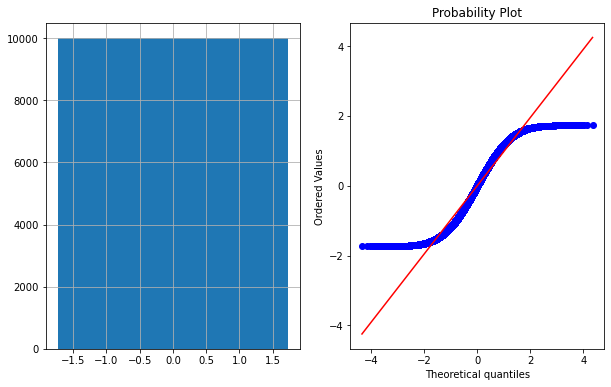

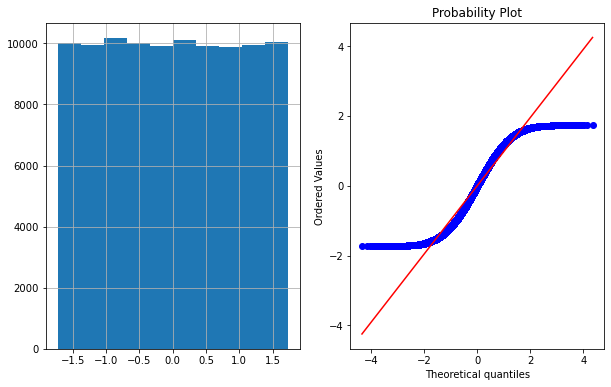

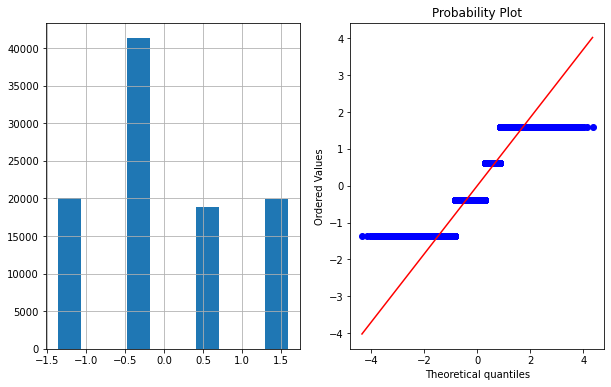

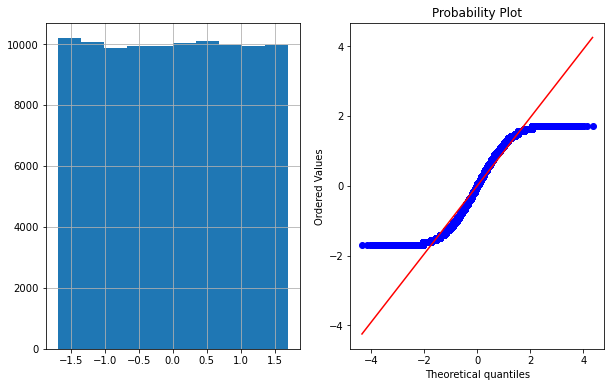

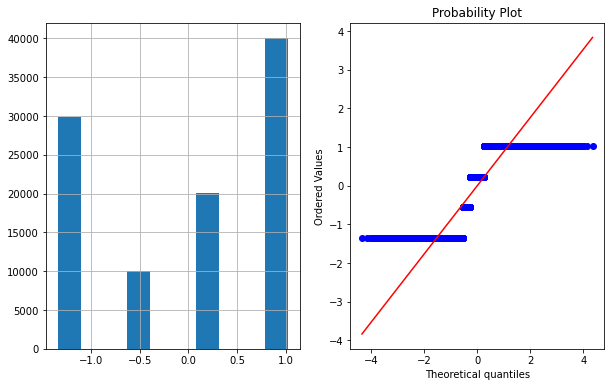

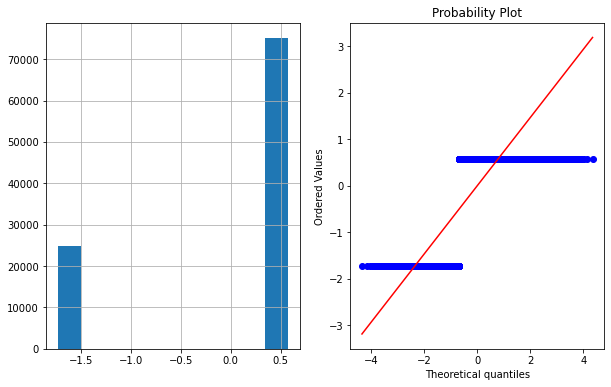

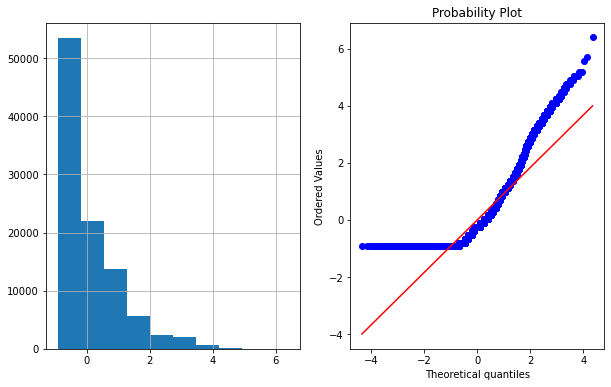

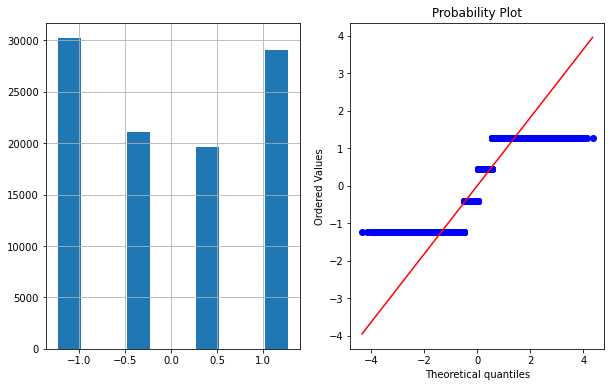

In [36]:
plot_data(X,'ticket')
plot_data(X,'requestor')
plot_data(X,'RequestorSeniority')
plot_data(X, 'ITOwner')
plot_data(X, 'FiledAgainst')
plot_data(X, 'TicketType')
plot_data(X, 'Severity')
plot_data(X, 'daysOpen')
## plot_data(X, 'Satisfaction')


In [37]:
Y = pd.DataFrame(Y)

In [38]:
Y.rename(columns={0:"Priority"}, inplace=True)

In [39]:
Y.value_counts()

Priority
0           30211
3           29063
1           21124
2           19602
dtype: int64

### Feature Selection

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
Ext = ExtraTreesClassifier()
Ext.fit(X,Y)

ExtraTreesClassifier()

In [42]:
print(Ext.feature_importances_)

[7.19231866e-03 7.43822503e-03 1.92132610e-03 1.02097289e-02
 1.79462452e-03 7.42219926e-04 7.30699674e-03 9.63394560e-01]


<AxesSubplot:>

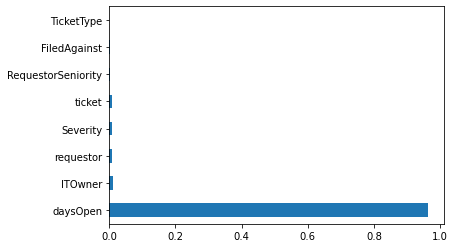

In [43]:
feature = pd.Series(Ext.feature_importances_,index=X.columns)
feature.sort_values(ascending=True).nlargest(15).plot(kind='barh')

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [45]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(75000, 8) (25000, 8) (75000, 1) (25000, 1)


### Correlation - To Check `Multicollinearity`

In [46]:
X_train.corr()

ticket  requestor  RequestorSeniority   ITOwner  \
ticket              1.000000   0.001336            0.001636 -0.000665   
requestor           0.001336   1.000000           -0.024604  0.000178   
RequestorSeniority  0.001636  -0.024604            1.000000  0.002046   
ITOwner            -0.000665   0.000178            0.002046  1.000000   
FiledAgainst        0.002741  -0.006979           -0.002460 -0.001369   
TicketType         -0.002267   0.003452            0.006431 -0.007299   
Severity            0.000713  -0.000241           -0.090875 -0.052930   
daysOpen            0.006659   0.008295            0.008586  0.026160   

                    FiledAgainst  TicketType  Severity  daysOpen  
ticket                  0.002741   -0.002267  0.000713  0.006659  
requestor              -0.006979    0.003452 -0.000241  0.008295  
RequestorSeniority     -0.002460    0.006431 -0.090875  0.008586  
ITOwner                -0.001369   -0.007299 -0.052930  0.026160  
FiledAgainst            1.000000    0.000352  0.424247 -0.006705  
TicketType              0.000352    1.000000  0.244522  0.001513  
Severity                0.424247    0.244522  1.000000 -0.071339  
daysOpen               -0.006705    0.001513 -0.071339  1.000000

<AxesSubplot:>

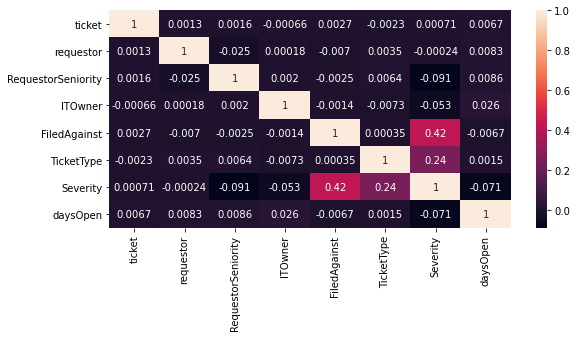

In [47]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(9,4))
sns.heatmap(X_train[top_features].corr(),annot=True)


In [48]:
threshold=0.7

In [49]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
correlation(X_train,threshold)

set()

#### Pipeline Creation

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
##from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [52]:
pipeline_lr=Pipeline([('scalar1',RobustScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [53]:
pipeline_dt=Pipeline([('scalar2',RobustScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [54]:
pipeline_randomforest=Pipeline([('scalar3',RobustScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [55]:
pipeline_gradient_boost=Pipeline([('scalar4',RobustScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('gb_classifier',GradientBoostingClassifier())])

In [56]:
pipeline_Adaboost=Pipeline([('scalar5',RobustScaler()),
                          ('pca5',PCA(n_components=2)),
                          ('xgb_classifier',AdaBoostClassifier())])

In [57]:
pipeline_knn=Pipeline([('scalar6',RobustScaler()),
                          ('pca6',PCA(n_components=2)),
                          ('knn_classifier',KNeighborsClassifier())])

In [58]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_gradient_boost,pipeline_Adaboost, pipeline_knn]

In [59]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

#### For `Target` Label Category

In [60]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'Gradient Boost', 4: 'Ada Boost', 5: 'KNN'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train,Y_train["Priority"])

In [61]:
for i,model in enumerate(pipelines):
    print("{} Accuracy: {}".format(pipe_dict[i],model.score(X_train,Y_train["Priority"])))

Logistic Regression Accuracy: 0.3031466666666667
Decision Tree Accuracy: 1.0
RandomForest Accuracy: 1.0
Gradient Boost Accuracy: 0.36684
Ada Boost Accuracy: 0.34013333333333334
KNN Accuracy: 0.5611466666666667


#### Hyper Parameter Tuning

In [62]:
gradient_grid = {
               'max_depth': [8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 150, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [10, 20, 40, 50, 60, 70, 80, 90],
               'min_samples_split': [200, 500, 800, 1000]
               }

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, 
                               param_distributions = gradient_grid, 
                               n_iter = 2, 
                               cv =2, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)


In [65]:
# Fit the random search model
gb_random.fit(X_train, Y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'max_depth': [8, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      150, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [10, 20, 40, 50, 60,
                                                             70, 80, 90],
                                        'min_samples_split': [200, 500, 800,
                                                              1000]},
                   random_state=42, verbose=2)

In [66]:
gb_random.best_params_

{'min_samples_split': 800,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 10}

In [67]:
best_random_grid=gb_random.best_estimator_

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_random=best_random_grid.predict(X_test)


In [69]:
print(classification_report(Y_test, y_pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7514
           1       1.00      1.00      1.00      5252
           2       1.00      1.00      1.00      4917
           3       1.00      1.00      1.00      7317

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



### Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': [gb_random.best_params_['min_samples_split'] - 40, 
    gb_random.best_params_['min_samples_split'], 
    gb_random.best_params_['min_samples_split'] + 40], 

    'min_samples_leaf': [gb_random.best_params_['min_samples_leaf'] - 10, 
    gb_random.best_params_['min_samples_leaf'], 
    gb_random.best_params_['min_samples_leaf'] + 10], 

    'max_features': [gb_random.best_params_['max_features']],

    'max_depth': [gb_random.best_params_['max_depth'] - 10,
    gb_random.best_params_['max_depth'],
    gb_random.best_params_['max_depth'] + 10 ]                                                                                            
}

print(param_grid)

{'min_samples_split': [760, 800, 840], 'min_samples_leaf': [10, 20, 30], 'max_features': ['sqrt'], 'max_depth': [0, 10, 20]}


In [71]:
grid_search=GridSearchCV(estimator=best_random_grid,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=10,
                                                  max_features='sqrt',
                                                  min_samples_leaf=20,
                                                  min_samples_split=800),
             n_jobs=-1,
             param_grid={'max_depth': [0, 10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [760, 800, 840]},
             verbose=2)

In [72]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=10, max_features='sqrt',
                           min_samples_leaf=10, min_samples_split=760)

In [73]:
best_grid=grid_search.best_estimator_

In [74]:
print(best_grid)

GradientBoostingClassifier(max_depth=10, max_features='sqrt',
                           min_samples_leaf=10, min_samples_split=760)


In [75]:
y_pred_grid=best_grid.predict(X_test)

In [76]:
y_pred_grid=pd.DataFrame(y_pred_grid)

#### Classification Report 

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [78]:
print(classification_report(Y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7514
           1       1.00      1.00      1.00      5252
           2       1.00      1.00      1.00      4917
           3       1.00      1.00      1.00      7317

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



In [79]:
print(y_pred_grid.value_counts())

0    7514
3    7317
1    5252
2    4917
dtype: int64


In [80]:
y_pred_grid.rename(columns={0:"Predict_grid"}, inplace=True)

In [81]:
y_pred_random = pd.DataFrame(y_pred_random)
print(y_pred_random.value_counts())

0    7514
3    7317
1    5252
2    4917
dtype: int64


In [82]:
y_pred_random.rename(columns={0:"Predict_random"}, inplace=True)

In [83]:
print(X_test.shape, y_pred_grid.shape)

(25000, 8) (25000, 1)


In [84]:
y_pred_grid = pd.DataFrame(y_pred_grid)

In [85]:
y_pred_grid.value_counts()

Predict_grid
0               7514
3               7317
1               5252
2               4917
dtype: int64

In [86]:
y_pred_random.value_counts()

Predict_random
0                 7514
3                 7317
1                 5252
2                 4917
dtype: int64

In [87]:
print(confusion_matrix(Y_test, y_pred_grid))

[[7514    0    0    0]
 [   0 5252    0    0]
 [   0    0 4917    0]
 [   0    0    0 7317]]


In [88]:
print(confusion_matrix(Y_test, y_pred_random))

[[7514    0    0    0]
 [   0 5252    0    0]
 [   0    0 4917    0]
 [   0    0    0 7317]]


In [89]:
c = test.Priority.astype('category')
d = dict(enumerate(c.cat.categories))

In [90]:
print(d)

{0: '0 - Unassigned', 1: '1 - Low', 2: '2 - Medium', 3: '3 - High'}


In [91]:
y_pred_grid = y_pred_grid["Predict_grid"].map(d)

In [92]:
y_pred_grid.value_counts()


0 - Unassigned    7514
3 - High          7317
1 - Low           5252
2 - Medium        4917
Name: Predict_grid, dtype: int64

In [93]:
y_pred_random = y_pred_random["Predict_random"].map(d)

In [94]:
y_pred_random.value_counts()

0 - Unassigned    7514
3 - High          7317
1 - Low           5252
2 - Medium        4917
Name: Predict_random, dtype: int64

In [95]:
y_pred_random = pd.DataFrame(y_pred_random)

In [96]:
y_pred_random.value_counts()

Predict_random
0 - Unassigned    7514
3 - High          7317
1 - Low           5252
2 - Medium        4917
dtype: int64

In [97]:
bw = y_pred_random.value_counts()

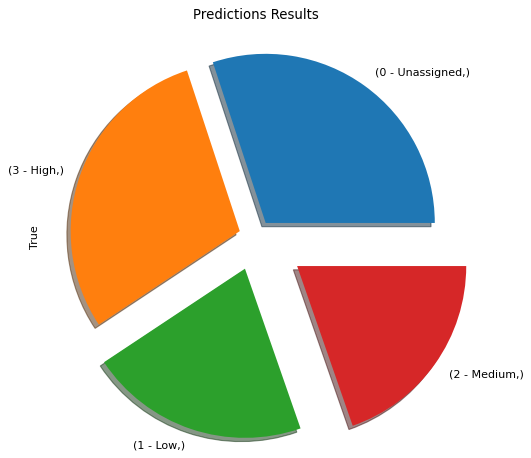

In [98]:
plt.figure(figsize=(10,7), dpi=80, facecolor='white')
explode=(0.1, 0.1, 0.2, 0.3)
bw.plot.pie(shadow=True, explode=explode, label=True)
plt.title("Predictions Results")
plt.show()